#Credit Card Transaction Classification (Fraudulent or Legitimate)

##Importing Libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the path should be the same for all of us
dt_path = '/content/drive/MyDrive/CreditCardDataset/fraudTrain.csv'

df = pd.read_csv(dt_path)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##Exploratory Data Analysis and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.shape

(1296675, 23)

In [ ]:
#Checking the types
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
#Checking the null values
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#checking for duplicates
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)

No duplicates found


In [ ]:
df.columns
#some of the columns, especially of type obj (names and etc) are not really useful, so we will drop them

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.select_dtypes(include = ['object']).nunique()
#categorical columns with too many unique values will be dropped too

trans_date_trans_time    1274791
merchant                     693
category                      14
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'trans_num', 'unix_time'], inplace = True) #, 'dob'

In [ ]:
df.tail()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
1296670,fraud_Reichel Inc,entertainment,15.56,M,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0
1296674,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,M,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,46.565983,-114.186110,0


In [ ]:
#Checking for duplicates after dropping the time
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)

No duplicates found


In [ ]:
# Plotting a heatmap
df_num_cols = df.select_dtypes(include=['float64', 'int64'])

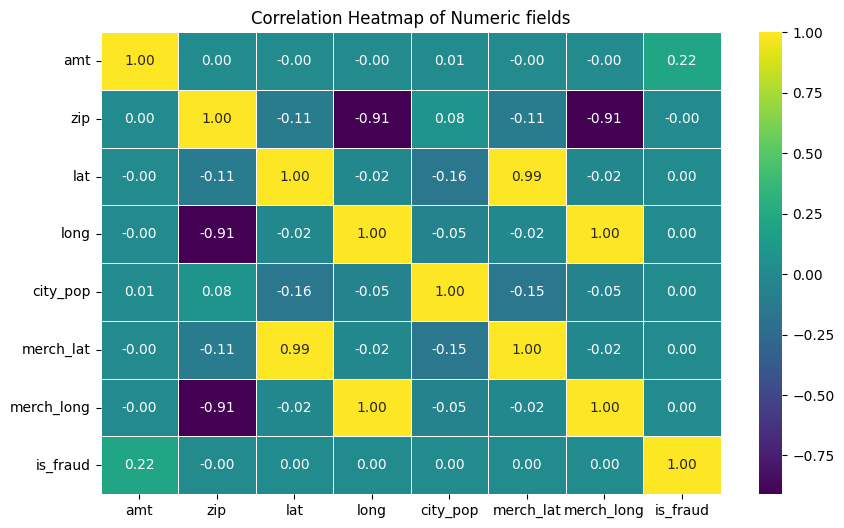

In [ ]:
correlation_matrix = df_num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric fields')
plt.show()
#as it turns out "long" and "merch_long" as well as "lat" and "merch_lat" are giving us the same info, have to drop one for each
#in addition, there is a very high negative correlation between zip and both of the mentioned cols

In [ ]:
df.drop(columns=['long', 'lat', 'zip'], inplace = True)

In [ ]:
fraud_correlation = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud      1.000000
amt           0.219404
zip           0.002162
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
Name: is_fraud, dtype: float64


In [ ]:
fraud_trans_count = (df['is_fraud'] == 1).sum()
valid_trans_count = (df['is_fraud'] == 0).sum()

print("Number of fraud transactions:", fraud_trans_count)
print("Number of valid transactions:", valid_trans_count)

Number of fraud transactions: 7506
Number of valid transactions: 1289169


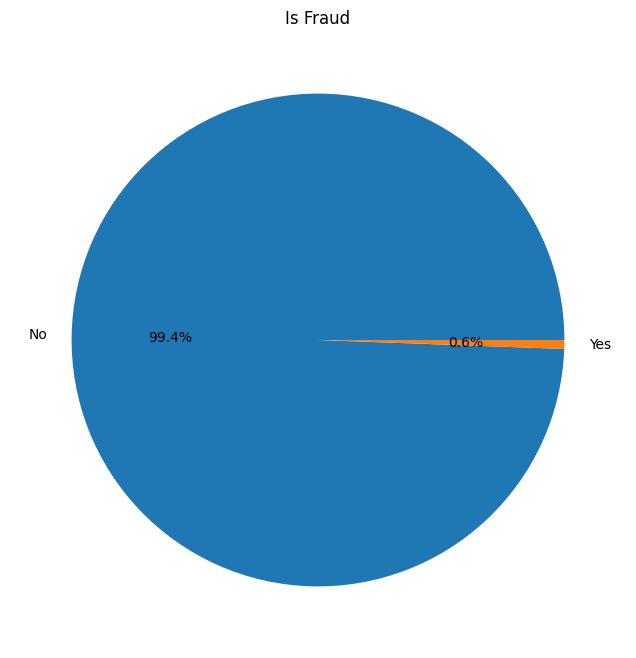

In [ ]:
#Proportion of fraudulent-non-fraudulent transactions
plt.figure(figsize = (10, 8))
is_fraud_count = df['is_fraud'].value_counts()
plt.pie(is_fraud_count, labels = ['No', 'Yes'], autopct="%0.1f%%")
plt.title('Is Fraud')
plt.show()
#Conclusion: highly imbalanced

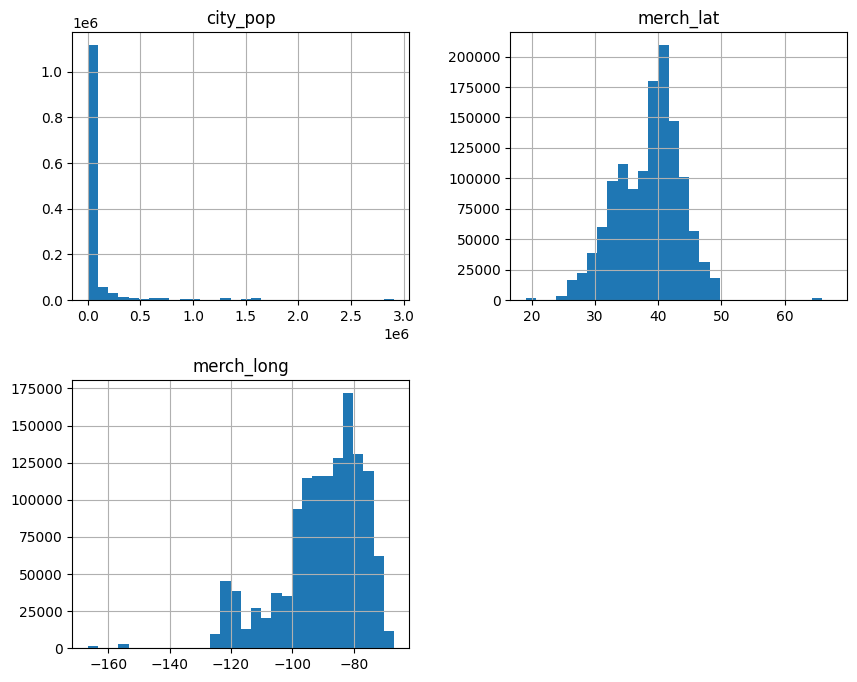

In [ ]:
#exploring the distributions of feature values
columns = ['city_pop', 'merch_lat', 'merch_long']

# Plot histograms for the specified columns
df[columns].hist(figsize=(10, 8), bins=30)  # Adjust the figure size and number of bins as needed
plt.show()

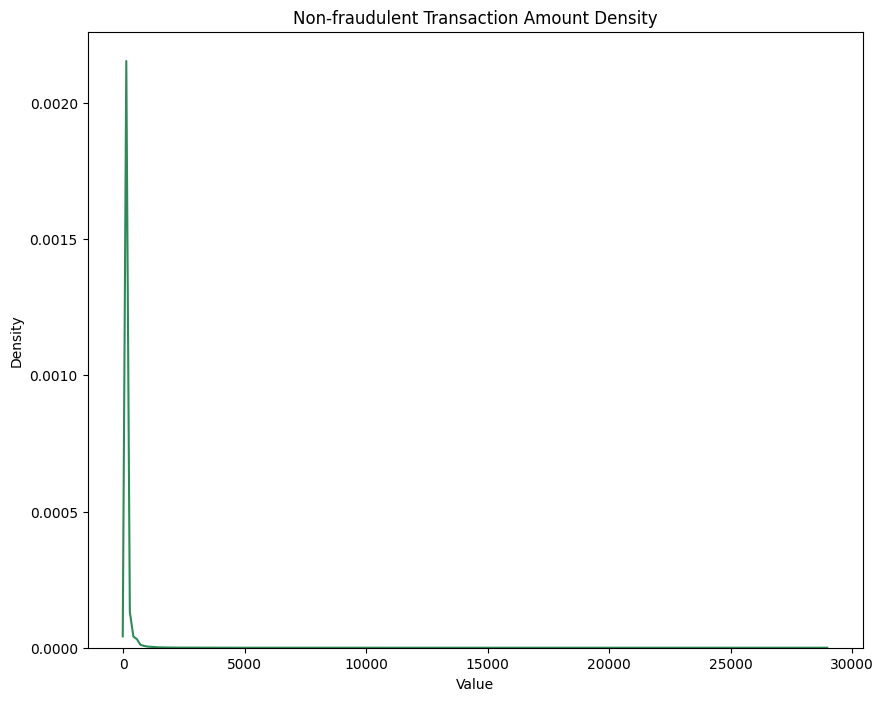

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(df[df['is_fraud'] == 0]['amt'], color = '#2E8B57')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Non-fraudulent Transaction Amount Density')
plt.show()

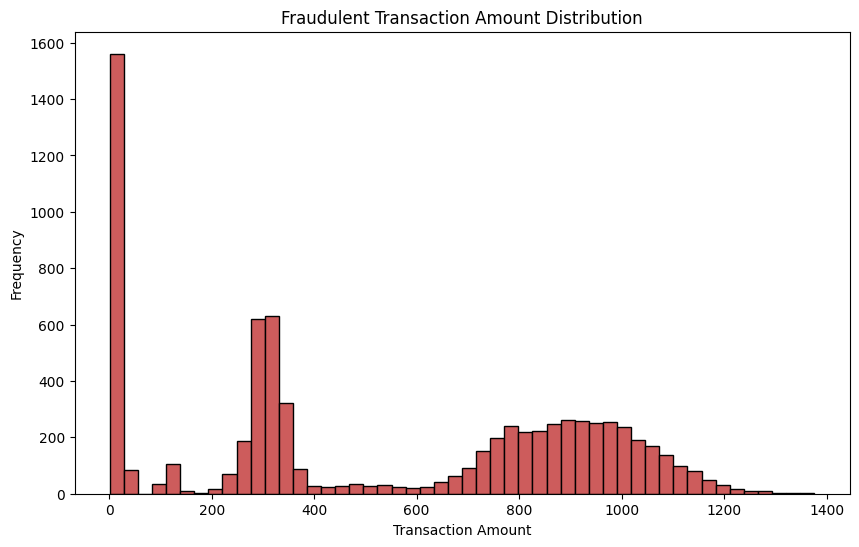

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['is_fraud'] == 1]['amt'], bins = 50, edgecolor = '#000000', color = '#CD5C5C')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Fraudulent Transaction Amount Distribution')
plt.show()

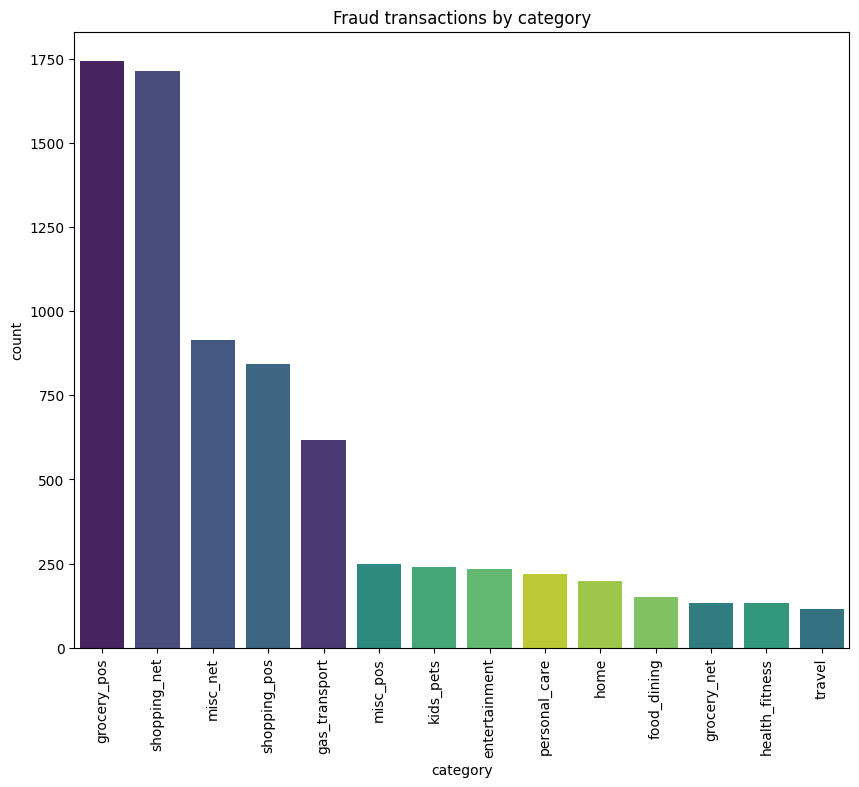

In [ ]:
#Fraud transactions by category
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the order of categories based on their frequency
category_order = df[df['is_fraud'] == 1]['category'].value_counts().index

# Create the count plot with ordered categories and letting Seaborn choose colors
plt.figure(figsize=(10, 8))
sns.countplot(x='category', data=df[df['is_fraud'] == 1], order=category_order, palette='viridis', hue='category', legend=False)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Fraud transactions by category')

plt.show()

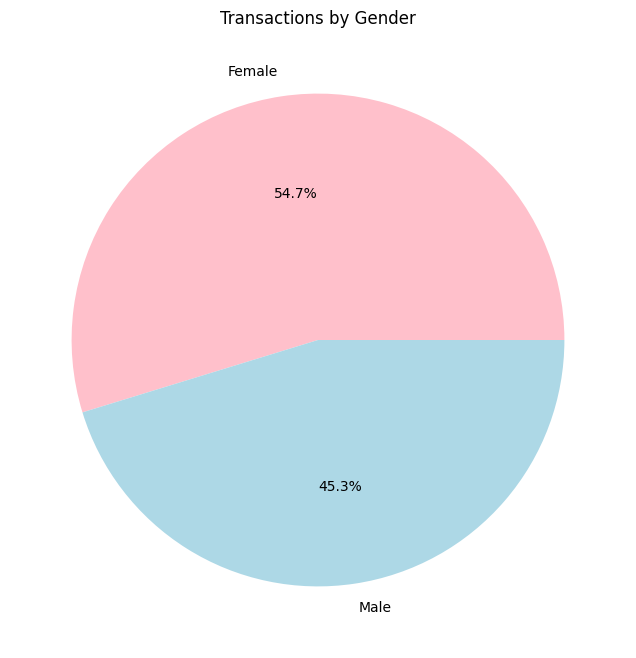

In [ ]:
#Gender distribution
plt.figure(figsize = (10, 8))
transactions_by_gender = df['gender'].value_counts()
plt.pie(transactions_by_gender, labels = ['Female', 'Male'], autopct="%0.1f%%", colors = ['pink', 'lightblue'])
plt.title('Transactions by Gender')
plt.show()

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, stratify=df.is_fraud, random_state = 42)

<Axes: title={'center': 'Verify that class distribution in train set is same as input data'}, xlabel='is_fraud'>

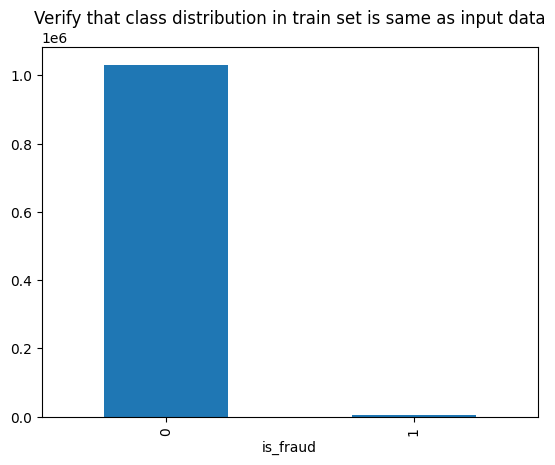

In [ ]:
train.pivot_table(index='is_fraud', aggfunc='size').plot(kind='bar', title='Verify that class distribution in train set is same as input data')

<Axes: title={'center': 'Verify that class distribution in test set is same as input data'}, xlabel='is_fraud'>

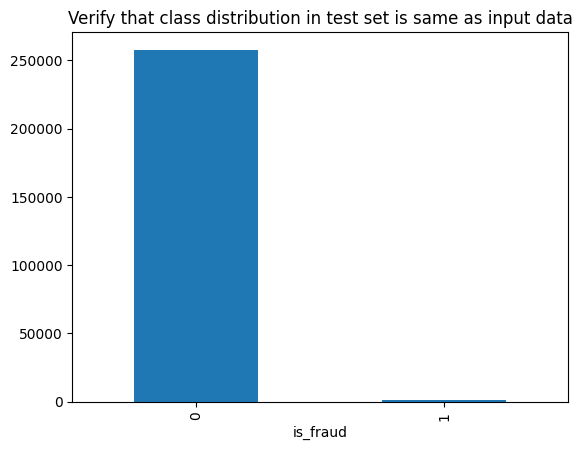

In [ ]:
test.pivot_table(index='is_fraud', aggfunc='size').plot(kind='bar', title='Verify that class distribution in test set is same as input data')

##Feature Engineering

In [ ]:
#Convert dob column into separate year, month, day numerical fields

train['dob'] = pd.to_datetime(train['dob'])

train['birth_year'] = train['dob'].dt.year
#df['birth_month'] = df['dob'].dt.month
#df['birth_day'] = df['dob'].dt.day

train.drop(columns=['dob'], inplace=True)

In [ ]:
train.head()

,merchant,category,amt,gender,city_pop,job,merch_lat,merch_long,is_fraud,birth_year
509059,"fraud_Stokes, Christiansen and Sipes",grocery_net,51.71,F,69,Chief Executive Officer,44.785928,-74.659301,0,1991
395295,fraud_Effertz LLC,entertainment,13.78,F,2526,Phytotherapist,31.414028,-98.152203,0,1970
536531,fraud_Kris-Padberg,shopping_pos,961.26,F,85,"Research officer, political party",49.118546,-122.622065,0,1984
271001,fraud_Ratke and Sons,health_fitness,43.68,M,128,Education administrator,39.528098,-121.059990,0,1966
532788,fraud_Upton PLC,entertainment,33.08,F,6703,Naval architect,39.213785,-92.188153,0,1998


In [ ]:
#Converting categorical values to numerical values using frequency encoder
merchant_frequency = train['merchant'].value_counts()
train['merchant_enc'] = train['merchant'].map(merchant_frequency)

category = train['category'].value_counts()
train['category_enc'] = train['category'].map(category)

job = train['job'].value_counts()
train['job_enc'] = train['job'].map(job)

In [ ]:
#Converting gender using one hot encoder
train = pd.get_dummies(train, columns=['gender'])

In [ ]:
train.head()

,merchant,category,amt,city_pop,job,merch_lat,merch_long,is_fraud,birth_year,merchant_enc,category_enc,job_enc,gender_F,gender_M
509059,"fraud_Stokes, Christiansen and Sipes",grocery_net,51.71,69,Chief Executive Officer,44.785928,-74.659301,0,1991,722,36346,5742,True,False
395295,fraud_Effertz LLC,entertainment,13.78,2526,Phytotherapist,31.414028,-98.152203,0,1970,1454,75351,2446,True,False
536531,fraud_Kris-Padberg,shopping_pos,961.26,85,"Research officer, political party",49.118546,-122.622065,0,1984,1834,93315,2888,True,False
271001,fraud_Ratke and Sons,health_fitness,43.68,128,Education administrator,39.528098,-121.059990,0,1966,1376,68673,829,False,True
532788,fraud_Upton PLC,entertainment,33.08,6703,Naval architect,39.213785,-92.188153,0,1998,1464,75351,6953,True,False


In [ ]:
train[['gender_F', 'gender_M']] = train[['gender_F', 'gender_M']].astype(int)
train.drop(columns = ['merchant', 'category', 'job'], inplace = True)

In [ ]:
train.drop(columns = ['gender_M'], inplace = True)

In [ ]:
column_descriptive_stats = train['birth_year'].describe()

print(column_descriptive_stats)

count    1.037340e+06
mean     1.973254e+03
std      1.738206e+01
min      1.924000e+03
25%      1.962000e+03
50%      1.975000e+03
75%      1.987000e+03
max      2.005000e+03
Name: birth_year, dtype: float64


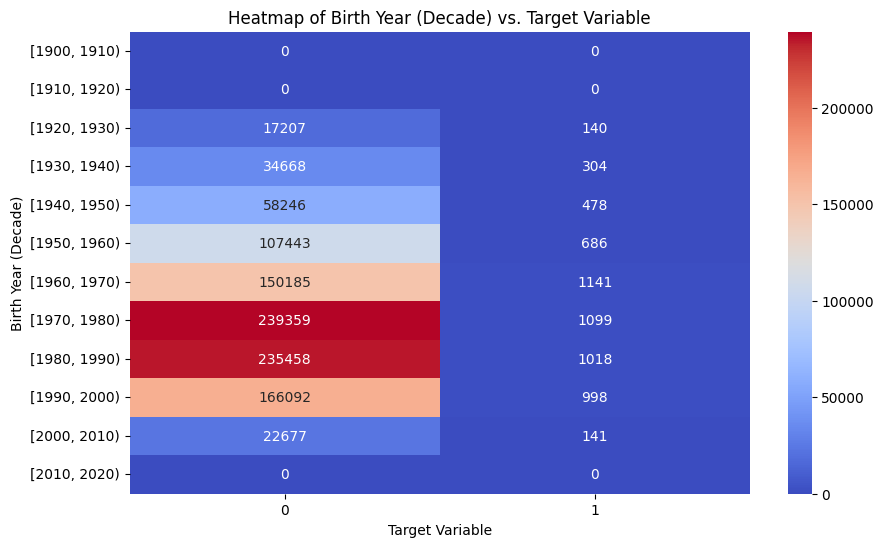

In [ ]:
train['birth_year_bin'] = pd.cut(train['birth_year'], bins=range(1900, 2021, 10), right=False)

# Pivot table to get counts of each class for each birth year bin
pivot_table = train.pivot_table(index='birth_year_bin', columns='is_fraud', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Birth Year (Decade) vs. Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Birth Year (Decade)')
plt.show()

In [ ]:
train.drop(columns = ['birth_year'], inplace = True)

In [ ]:
train.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,merchant_enc,category_enc,job_enc,gender_F,birth_year_bin
509059,51.71,69,44.785928,-74.659301,0,722,36346,5742,1,"[1990, 2000)"
395295,13.78,2526,31.414028,-98.152203,0,1454,75351,2446,1,"[1970, 1980)"
536531,961.26,85,49.118546,-122.622065,0,1834,93315,2888,1,"[1980, 1990)"
271001,43.68,128,39.528098,-121.059990,0,1376,68673,829,0,"[1960, 1970)"
532788,33.08,6703,39.213785,-92.188153,0,1464,75351,6953,1,"[1990, 2000)"


In [ ]:
train.drop(columns = ['birth_year_bin'], inplace = True)

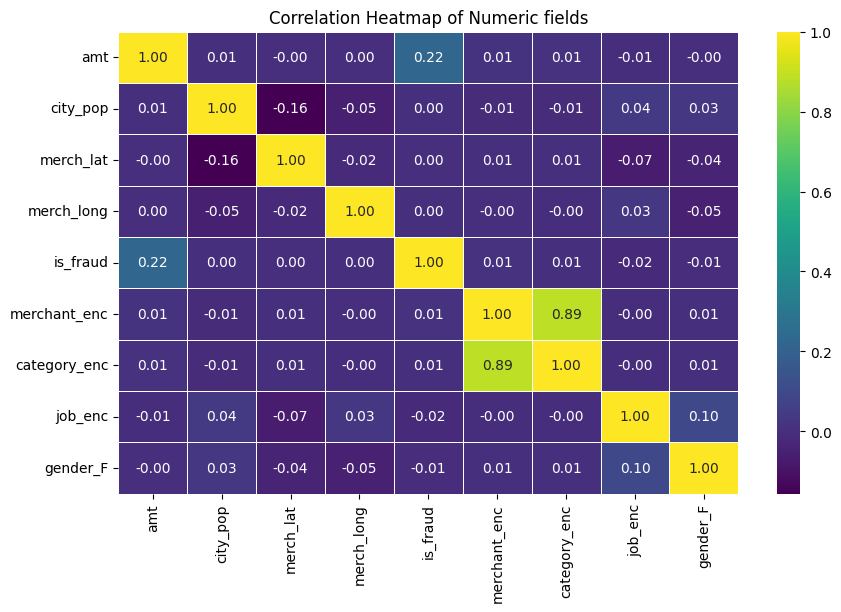

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric fields')
plt.show()

In [ ]:
train.describe()
#none of the algorithms we are going to use are distance dependent, that is why standardization is enough

,amt,city_pop,merch_lat,merch_long,is_fraud,merchant_enc,category_enc,job_enc,gender_F
count,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06,1.037340e+06
mean,7.034117e+01,8.874876e+04,3.853932e+01,-9.022867e+01,5.788845e-03,1.638085e+03,8.054424e+04,3.150849e+03,5.468911e-01
std,1.570584e+02,3.020180e+05,5.110690e+00,1.377196e+01,7.586395e-02,4.234543e+02,1.922846e+04,1.613233e+03,4.977966e-01
min,1.000000e+00,2.300000e+01,1.902980e+01,-1.666712e+02,0.000000e+00,5.740000e+02,3.243400e+04,3.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.473451e+01,-9.690412e+01,0.000000e+00,1.422000e+03,7.262000e+04,2.011000e+03,0.000000e+00
50%,4.750000e+01,2.456000e+03,3.937045e+01,-8.744114e+01,0.000000e+00,1.597000e+03,7.809200e+04,2.879000e+03,1.000000e+00
75%,8.305000e+01,2.032800e+04,4.195735e+01,-8.023880e+01,0.000000e+00,1.952000e+03,9.845800e+04,4.367000e+03,1.000000e+00
max,2.739012e+04,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,3.528000e+03,1.054110e+05,7.790000e+03,1.000000e+00


In [ ]:
# Separate features and target variable
X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

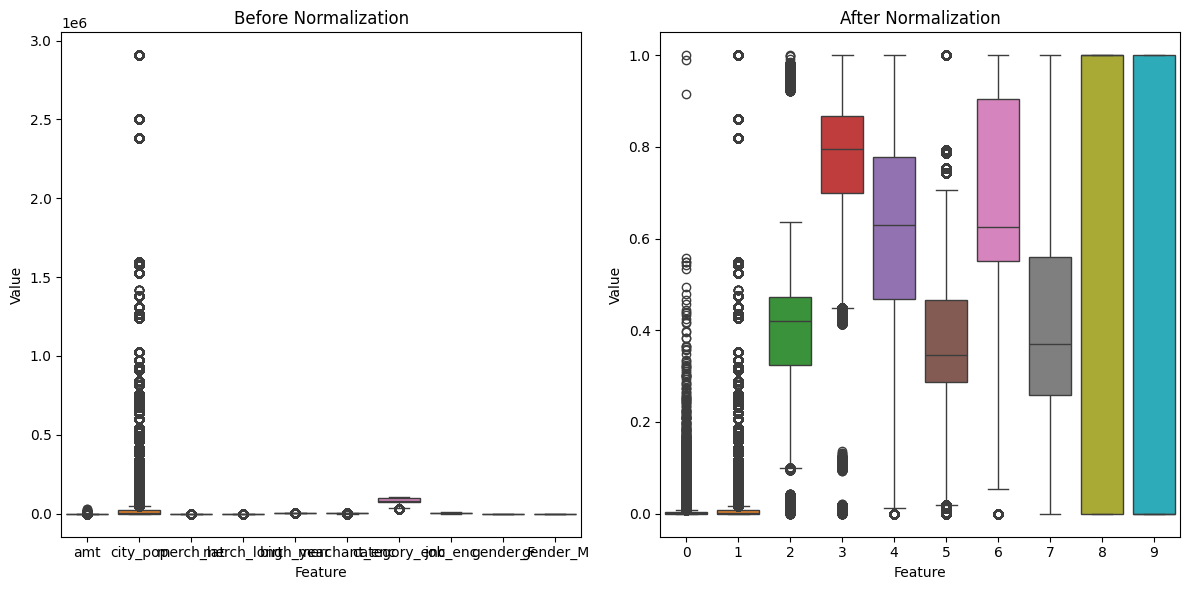

In [ ]:
# Plot before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Normalization')
plt.xlabel('Feature')
plt.ylabel('Value')


# Plot after normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('After Normalization')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
print(pd.Series(y_train).value_counts())

is_fraud
0    1031335
1       6005
Name: count, dtype: int64


#Feature Importance and Selection


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier with scaled data
rf_no_res = rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_no_res.feature_importances_

In [ ]:
feature_names = X_train.columns.tolist()

# Zip the feature names and importances together
features_and_importances = zip(feature_names, feature_importances)

# Sort the features by importance in descending order
sorted_features = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Print the sorted features
for feature, importance in sorted_features:
    print(f"Feature {feature}: Importance = {importance}")

Feature amt: Importance = 0.5190475357493995
Feature category_enc: Importance = 0.09564113935395689
Feature merchant_enc: Importance = 0.09206341033061786
Feature merch_long: Importance = 0.07763843055272775
Feature merch_lat: Importance = 0.07653378522199629
Feature job_enc: Importance = 0.07200780704630533
Feature city_pop: Importance = 0.05780627871632921
Feature gender_F: Importance = 0.00926161302866727


##Select features according to a percentile of the highest scores.

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
#Select optimal subset to keep the top 40% of features

selector = SelectPercentile(score_func=chi2, percentile=60)
selection_df = selector.fit_transform(X_train_scaled, y_train)

In [ ]:
selected_mask = selector.get_support()

# Get the names of selected features
selected_features = pd.DataFrame(X_train_scaled).columns[selected_mask]

# Print or display the selected feature names
# Print or display the selected feature names
for i in selected_features:
  print("Selected feature:", feature_names[i])

Selected feature: amt
Selected feature: merchant_enc
Selected feature: category_enc
Selected feature: job_enc
Selected feature: gender_F


##Select features according to the k highest scores.

In [ ]:
#Select optimal subset to keep top 5 features
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(score_func=chi2, k=5)
selection_df = selector.fit_transform(X_train_scaled, y_train)

In [ ]:
selected_mask = selector.get_support()

# Get the names of selected features
selected_features = pd.DataFrame(X_train_scaled).columns[selected_mask]

# Print or display the selected feature names
for i in selected_features:
  print("Selected feature:", feature_names[i])

Selected feature: amt
Selected feature: merchant_enc
Selected feature: category_enc
Selected feature: job_enc
Selected feature: gender_F


In [ ]:
# selection_ = train[['category_enc', 'merchant_enc', 'amt', 'job_enc', 'gender_F']]

##Select the p-values below alpha based on a FPR test

In [ ]:
from sklearn.feature_selection import SelectFpr, chi2

selector = SelectFpr(chi2, alpha=0.01)
selection_df = selector.fit_transform(X_train_scaled, y_train)

In [ ]:
selected_mask = selector.get_support()

# Get the names of selected features
selected_features = pd.DataFrame(X_train_scaled).columns[selected_mask]

# Print or display the selected feature names
for i in selected_features:
  print("Selected feature:", feature_names[i])

Selected feature: amt
Selected feature: job_enc
Selected feature: gender_F


##Select features by computing the ANOVA F-value for the provided sample

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif

# Generate synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=7, n_classes=2, random_state=42)

# Compute ANOVA F-value and p-value for each feature
f_values, p_values = f_classif(X, y)

# Display ANOVA F-values, p-values, and feature names for each feature
for i, (feature_name, f_val, p_val) in enumerate(zip(feature_names, f_values, p_values)):
    print(f"Feature {i+1} ({feature_name}): ANOVA F-value = {f_val:.4f}, p-value = {p_val:.4f}")

Feature 1 (amt): ANOVA F-value = 136.9255, p-value = 0.0000
Feature 2 (city_pop): ANOVA F-value = 0.7727, p-value = 0.3815
Feature 3 (merch_lat): ANOVA F-value = 0.0185, p-value = 0.8922
Feature 4 (merch_long): ANOVA F-value = 0.6509, p-value = 0.4217
Feature 5 (merchant_enc): ANOVA F-value = 1.1637, p-value = 0.2833
Feature 6 (category_enc): ANOVA F-value = 290.6773, p-value = 0.0000
Feature 7 (job_enc): ANOVA F-value = 4.1771, p-value = 0.0437


##Selecting features by estimating mutual information for a discrete target variable.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Get the indices of the top 3 features
top_indices = np.argsort(mi_scores)[-3:]

# Print the top 3 feature names and their mutual information scores
print("Top 3 Features and Their Mutual Information Scores:")
for feature_name, mi_score in zip(feature_names, mi_scores[top_indices]):
    print(f"{feature_name}: {mi_score:.4f}")

Top 3 Features and Their Mutual Information Scores:
amt: 0.0174
city_pop: 0.0203
merch_lat: 0.1472


In [ ]:
#I don't see the point of fitting with 3 models

##Applying Hybrid Resamping

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

desired_ratio = 0.01  # For example, to have half the number of majority instances as minority instances

# Apply Random UnderSampler with a specific sampling ratio
rus = RandomUnderSampler(sampling_strategy=desired_ratio, random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
# from imblearn.under_sampling import NearMiss

# near_miss = NearMiss(version=3)
# X_resampled, y_resampled = near_miss.fit_resample(X_train_scaled, y_train)

##not helping!

In [ ]:
print("Class distribution after hybrid resampling:")
print(pd.Series(y_train_undersampled).value_counts())

Class distribution after hybrid resampling:
is_fraud
0    600500
1      6005
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_undersampled, y_train_undersampled)

In [ ]:
print("Class distribution after over resampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after hybrid resampling:
is_fraud
0    600500
1    600500
Name: count, dtype: int64


##SMOTE Borderline resampling
!not helpful

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE

# borderline_smote = BorderlineSMOTE(random_state=42)
# X_train_resampled_smote, y_train_resampled_smote = borderline_smote.fit_resample(X_train_undersampled, y_train_undersampled)

In [ ]:
# print("Class distribution after borderline resampling:")
# print(pd.Series(y_train_resampled).value_counts())

Class distribution after hybrid resampling:
is_fraud
0    600500
1    600500
Name: count, dtype: int64


##Applying Cross Validation
NOTE: did not really help, taking too much time

In [ ]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier()

# # Initialize StratifiedKFold with number of folds
# num_folds = 3
# stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Perform stratified k-fold cross-validation
# cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=stratified_kfold)
# #too time and resource consuming
# #cannot handle the power

In [ ]:
# # Print the cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score:", cv_scores.mean())

##Applying Random Forest With Hybrid Random Resampling


In [ ]:
# Train the classifier with resampled data
rf = rf_classifier.fit(X_train_resampled, y_train_resampled)

##Applying Random Forest With Selected Features Only and Hybrid Resampling

In [ ]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_train_selected = X_train_resampled_df[['amt', 'gender_F', 'merchant_enc', 'category_enc', 'job_enc']]
# Train the classifier with selected features only
rf_fs_5 = rf_classifier.fit(X_train_selected, y_train_resampled)

##Applying Random Forest With Selected Features Only and Hybrid Resampling (FPR 3 most important)

In [ ]:
X_train_selected_3 = X_train_resampled_df[['amt', 'gender_F', 'job_enc']]
# Train the classifier with selected features only
rf_fs_3 = rf_classifier.fit(X_train_selected_3, y_train_resampled)

##Applying RD with 7 features ANOVA

In [ ]:
X_train_selected_7 = X_train_resampled_df[['amt', 'city_pop', 'merch_lat', 'merch_long', 'merchant_enc', 'category_enc', 'job_enc']]
# Train the classifier with selected features only
rf_fs_7 = rf_classifier.fit(X_train_selected_7, y_train_resampled)

##Applying Random Forest with SMOTE Resampling

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# #X_train_selected = X_train_resampled[['amt', 'merch_long', 'merchant_enc', 'category_enc', 'job_enc']]
# # Train the classifier
# rf_classifier_smote = rf_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)

In [ ]:
#  #we are getting these results with SMOTE
#               precision    recall  f1-score   support

#            0       1.00      0.93      0.96    257834
#            1       0.07      0.85      0.13      1501

#     accuracy                           0.93    259335
#    macro avg       0.53      0.89      0.54    259335
# weighted avg       0.99      0.93      0.96    259335

##Preprocessing Test Set and Model Prediction


In [ ]:
#Converting categorical values to numerical values using frequency encoder
merchant_frequency = test['merchant'].value_counts()
test['merchant_enc'] = test['merchant'].map(merchant_frequency)

category = test['category'].value_counts()
test['category_enc'] = test['category'].map(category)

job = test['job'].value_counts()
test['job_enc'] = test['job'].map(job)

In [ ]:
#Converting gender using one hot encoder
test = pd.get_dummies(test, columns=['gender'])

In [ ]:
#Convert dob column into separate year, month, day numerical fields

test['dob'] = pd.to_datetime(test['dob'])

test['birth_year'] = test['dob'].dt.year
#df['birth_month'] = df['dob'].dt.month
#df['birth_day'] = df['dob'].dt.day

test.drop(columns=['dob'], inplace=True)

In [ ]:
test.drop(columns=['birth_year'], inplace=True)

In [ ]:
test[['gender_F', 'gender_M']] = test[['gender_F', 'gender_M']].astype(int)
test.drop(columns = ['merchant', 'category', 'job'], inplace = True)

In [ ]:
test.drop(columns = ['gender_M'], inplace = True)

In [ ]:
test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,merchant_enc,category_enc,job_enc,gender_F
1161537,6.64,1909,41.405953,-77.922023,0,277,12854,1258,1
192923,68.85,34882,33.510847,-118.731586,0,549,26248,650,1
1086283,122.90,96942,42.264618,-82.498996,0,529,24657,91,0
1069482,92.78,22305,38.737145,-82.588436,0,557,26248,631,1
689806,61.51,5438,42.026482,-72.653926,0,515,24831,992,1


In [ ]:
# Separate features and target variable
X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

##Fit the model

In [ ]:
#without resampling
y_pred_no_res = rf_no_res.predict(X_test_scaled)

In [ ]:
# resampled data
y_pred = rf.predict(X_test_scaled)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_selected = X_test_scaled_df[['amt', 'gender_F', 'merchant_enc', 'category_enc', 'job_enc']]
# Train the classifier with selected features only
y_pred_fs_5 = rf_fs_5.predict(X_test_selected)

In [ ]:
X_test_selected_3 = X_test_scaled_df[['amt', 'gender_F', 'job_enc']]
# Train the classifier with selected features only
y_pred_fs_3 = rf_fs_3.predict(X_test_selected_3)

In [ ]:
X_test_selected_7 = X_test_scaled_df[['amt', 'city_pop', 'merch_lat', 'merch_long', 'merchant_enc', 'category_enc', 'job_enc']]
# Train the classifier with selected features only
y_pred_fs_7 = rf_fs_7.predict(X_test_selected_7)

##**Performance without Resampling**

<Axes: >

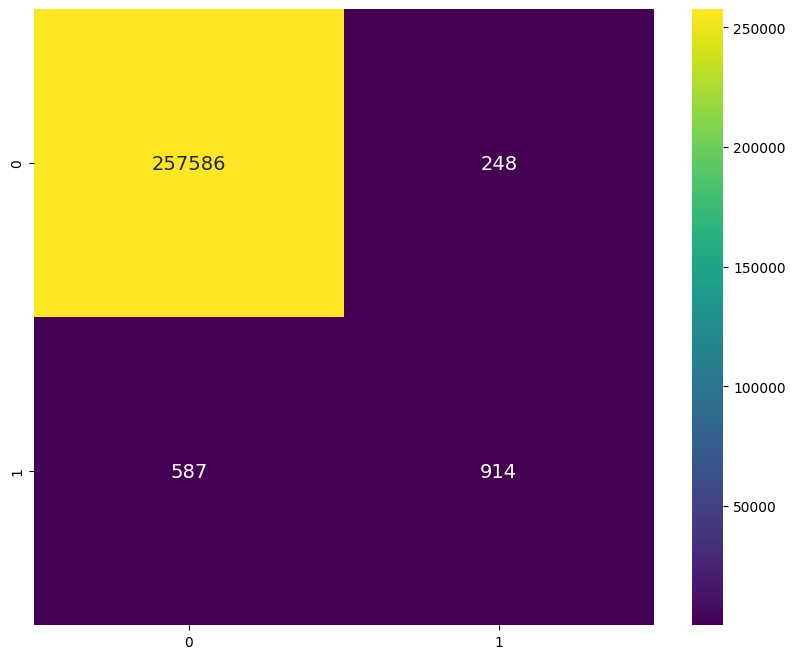

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred_no_res)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.2
#Random Forest Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_no_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.79      0.61      0.69      1501

    accuracy                           1.00    259335
   macro avg       0.89      0.80      0.84    259335
weighted avg       1.00      1.00      1.00    259335



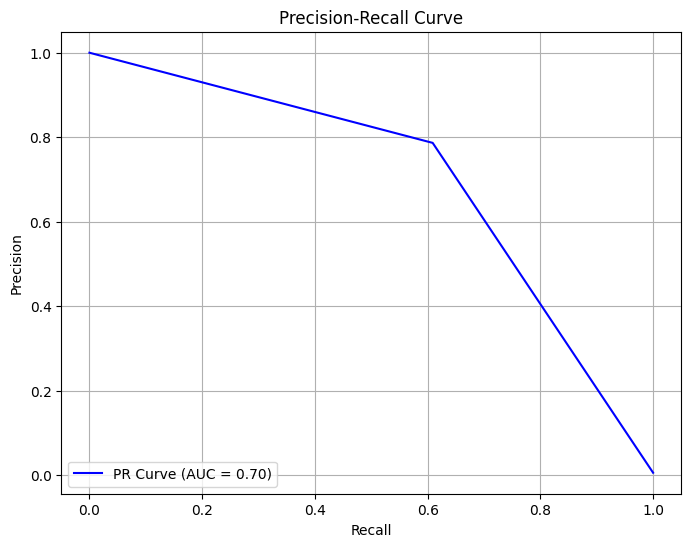

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_pred_no_res)

# Compute area under the curve (AUC) for PR curve
auc_score = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

##**Performance without Feature Selection**

<Axes: >

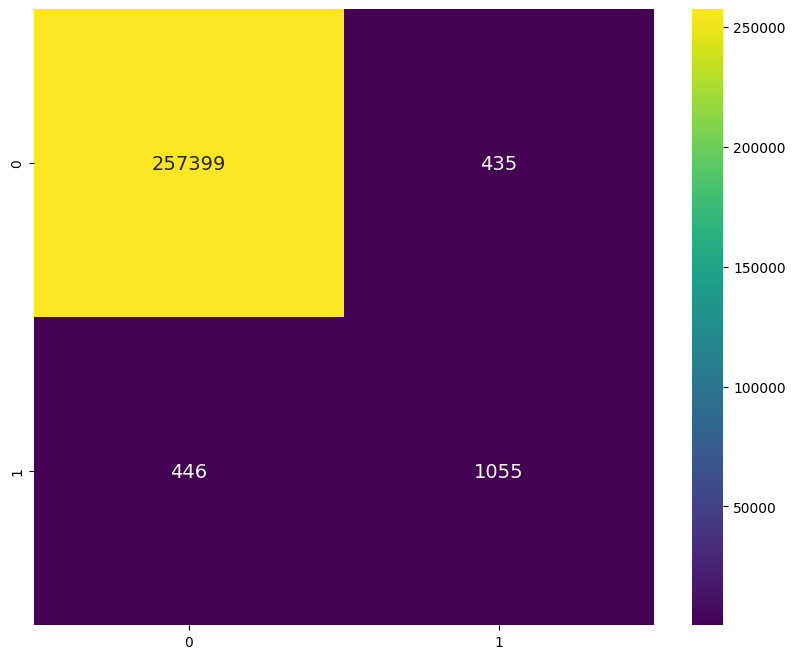

In [ ]:
fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.01
#Random Forest Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.71      0.70      0.71      1501

    accuracy                           1.00    259335
   macro avg       0.85      0.85      0.85    259335
weighted avg       1.00      1.00      1.00    259335



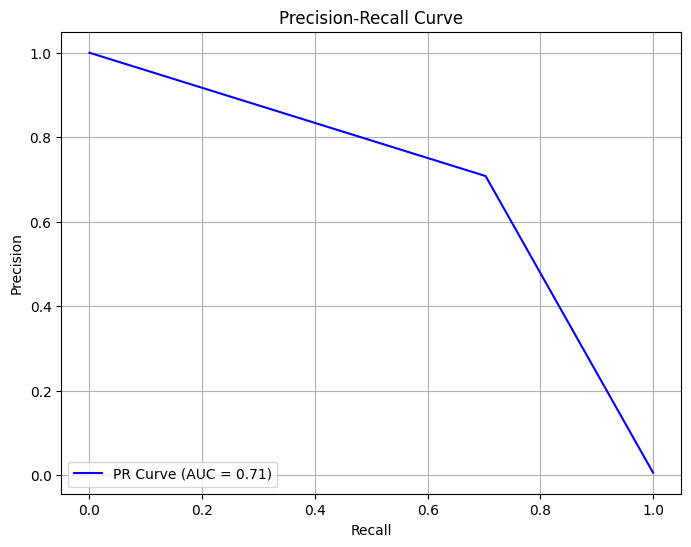

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Compute area under the curve (AUC) for PR curve
auc_score = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

##**Performance with Feature Selection**

<Axes: >

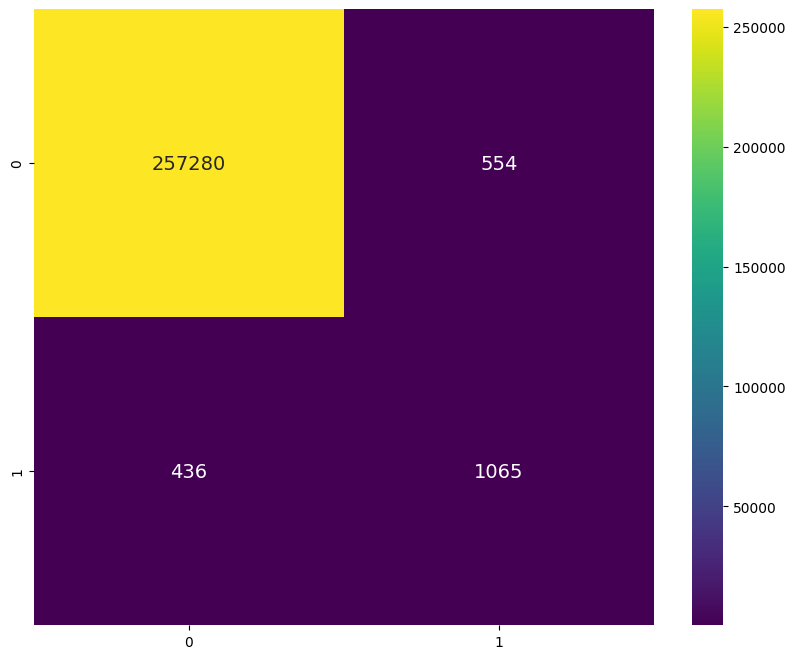

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred_fs_5)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.2
#Random Forest Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_fs_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.66      0.71      0.68      1501

    accuracy                           1.00    259335
   macro avg       0.83      0.85      0.84    259335
weighted avg       1.00      1.00      1.00    259335



##Performance with FPR Feature Selection

<Axes: >

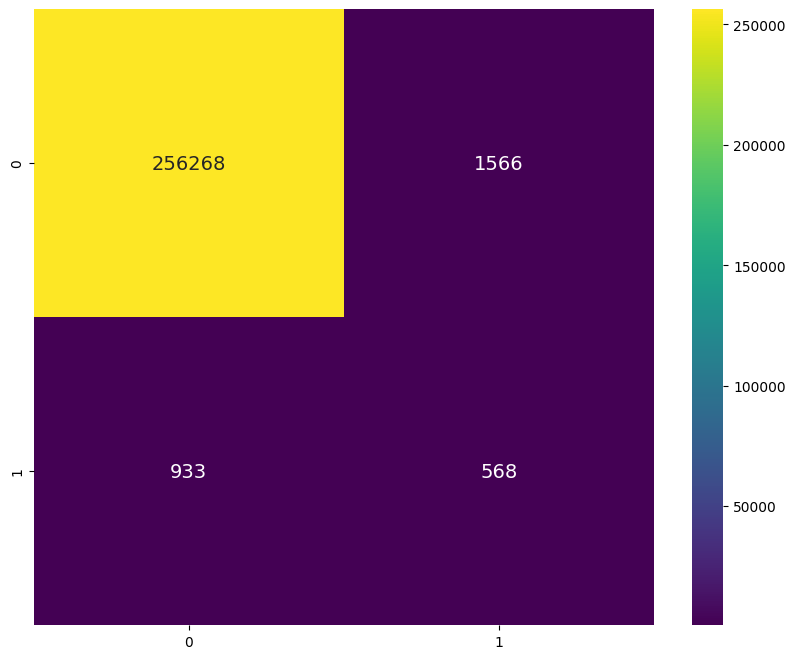

In [ ]:
fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred_fs_3)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.2
#Random Forest Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_fs_3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.27      0.38      0.31      1501

    accuracy                           0.99    259335
   macro avg       0.63      0.69      0.65    259335
weighted avg       0.99      0.99      0.99    259335



##Performance with ANOVA 7 most important features

<Axes: >

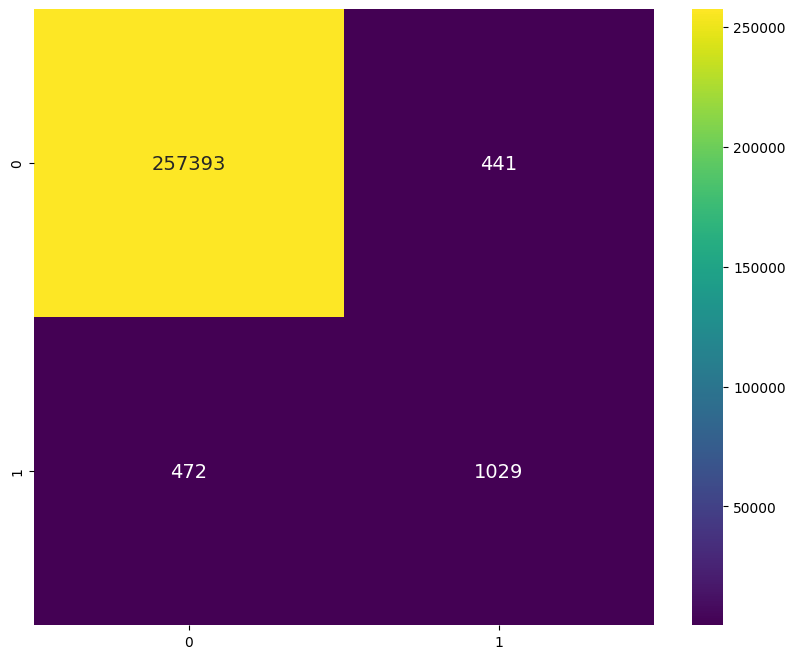

In [ ]:
fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred_fs_7)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.2
#Random Forest Results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_fs_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.70      0.69      0.69      1501

    accuracy                           1.00    259335
   macro avg       0.85      0.84      0.85    259335
weighted avg       1.00      1.00      1.00    259335



##Some predictions

In [ ]:
predictions = rf.predict(X_test_scaled)

# Convert y_test to a DataFrame if it's not already one
y_test_df = pd.DataFrame(y_test)

# Reset the index of y_test_df to align with the indices of predictions
y_test_df.reset_index(drop=True, inplace=True)
random_indices = random.sample(range(len(y_test)), 15)
# Print predicted and actual values side by side
print("Predicted\tActual")
for i in random_indices:  # Print the first 5 predictions for comparison
    print(predictions[i], "\t\t", y_test_df.iloc[i, 0])


Predicted	Actual
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
0 		 0
0 		 0
